# ASL - Report Notebook

## 1. System Overview (75 pts)

In [1]:
%load_ext autoreload
%autoreload 2

%aimport queries.query_mw, queries.query_client, queries.query_rthist_mw, queries.query_rthist_client, queries.weighted_stats, queries.hist_stats, queries.query_2k
 
%aimport plots.ctrl, plots.rt, plots.tp, plots.qwt, plots.ntt, plots.wtt, plots.sst, plots.table_2k

suite={
    "exp21":"base_run",
    "exp22":"base_run",
    "exp31":"base_run",
    "exp32":"base_run",
    "exp41":"base_run_part2",
    "exp51":"base_run_part6",
    "exp52":"test_network2", #"base_run_part6",
    "exp60":"base_run_part3"
}

#%matplotlib notebook


#### TODO:
- queue length queries
- find solution to incorporate repetitions in mget section 5
- find solution for horizontal aligning

## 2. Baseline without MW (75 pts)

### 2.1 One Server

In [2]:
exp_name="exp21"
df_exp21 = queries.query_client.load_df(suite=suite[exp_name], exp=exp_name)

#### Write-Only

C:\Users\nicok\Miniconda3\envs\asl\lib\site-packages\matplotlib\font_manager.py:1241: UserWarning: findfont: Font family ['serif'] not found. Falling back to DejaVu Sans.
  (prop.get_family(), self.defaultFamily[fontext]))


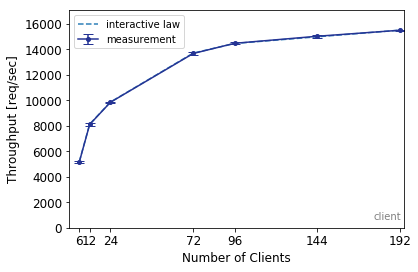

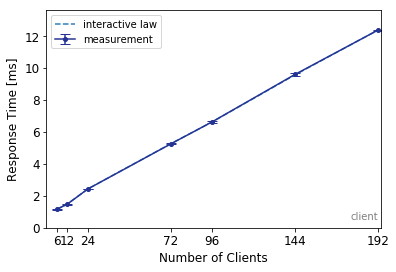

In [3]:
df_exp21_wo = df_exp21[df_exp21['workload']=='write-only']
plots.ctrl.generate(plots.tp.nc, df_exp21_wo, suite[exp_name], f"{exp_name}_wo_tp_nc") # throughput vs num_clients plot
plots.ctrl.generate(plots.rt.nc, df_exp21_wo, suite[exp_name], f"{exp_name}_wo_rt_nc") # response time vs num_clients plot

#### Read-Only

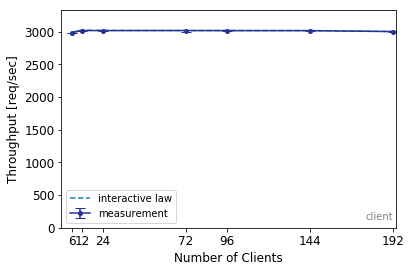

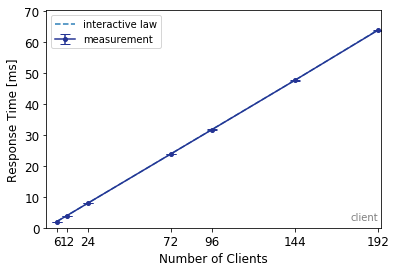

In [4]:
df_exp21_ro = df_exp21[df_exp21['workload']=='read-only']

plots.ctrl.generate(plots.tp.nc, df_exp21_ro, suite[exp_name], f"{exp_name}_ro_tp_nc") # throughput vs num_clients plot
plots.ctrl.generate(plots.rt.nc, df_exp21_ro, suite[exp_name], f"{exp_name}_ro_rt_nc") # response time vs num_clients plot

### 2.2 Two Server

In [5]:
exp_name="exp22"
df_exp22 = queries.query_client.load_df(suite=suite[exp_name], exp=exp_name)

#### Write-Only

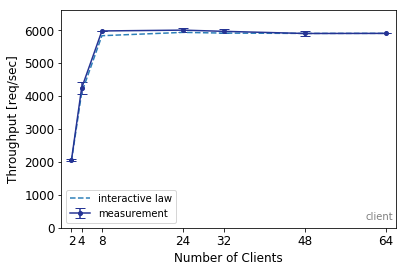

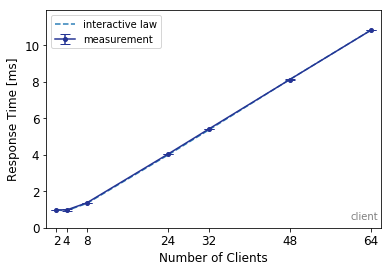

In [6]:
df_exp22_wo = df_exp22[df_exp22['workload']=='write-only']

plots.ctrl.generate(plots.tp.nc, df_exp22_wo, suite[exp_name], f"{exp_name}_wo_tp_nc") # throughput vs num_clients plot
plots.ctrl.generate(plots.rt.nc, df_exp22_wo, suite[exp_name], f"{exp_name}_wo_rt_nc") # response time vs num_clients plot

#### Read-Only

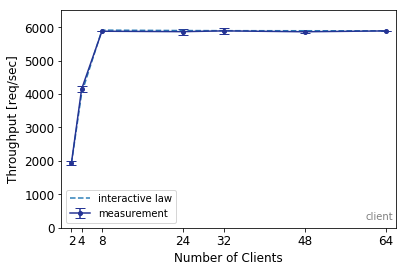

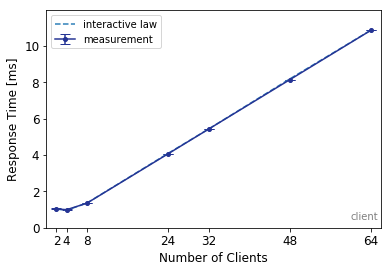

In [7]:
df_exp22_ro = df_exp22[df_exp22['workload']=='read-only']

plots.ctrl.generate(plots.tp.nc, df_exp22_ro, suite[exp_name], f"{exp_name}_ro_tp_nc") # throughput vs num_clients plot
plots.ctrl.generate(plots.rt.nc, df_exp22_ro, suite[exp_name], f"{exp_name}_ro_rt_nc") # response time vs num_clients plot

### 2.3 Summary

In [8]:
# Code to generate the summary

## 3. Baseline with MW (90 pts)

### 3.1 One Middleware

In [9]:
exp_name="exp31"
df_exp31_mw = queries.query_mw.load_df(suite=suite[exp_name], exp=exp_name)
df_exp31_client = queries.query_client.load_df(suite=suite[exp_name], exp=exp_name)

#### Write-Only

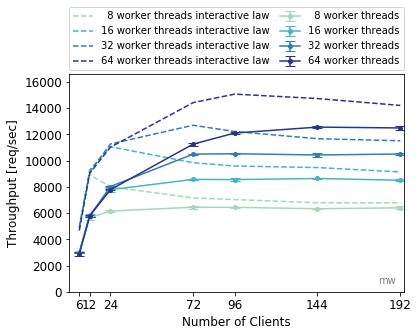

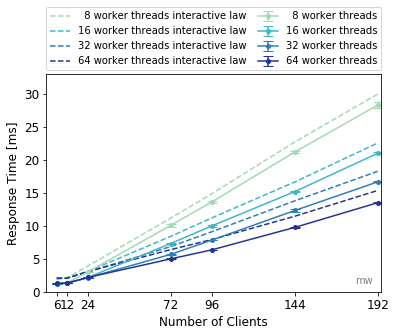

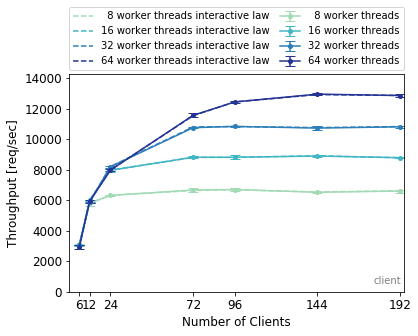

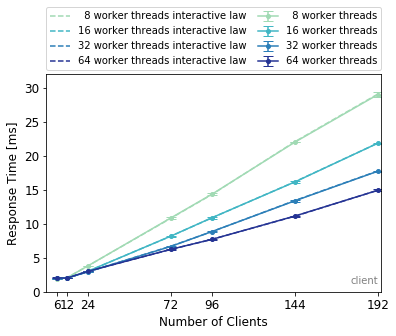

In [10]:
df_exp31_wo_mw = df_exp31_mw[df_exp31_mw['workload']=='write-only']
df_exp31_wo_c = df_exp31_client[df_exp31_client['workload']=='write-only']

plots.ctrl.generate(plots.tp.nc_w, df_exp31_wo_mw, suite[exp_name], f"{exp_name}_wo_tp_nc_w") # throughput vs num_clients plot
plots.ctrl.generate(plots.rt.nc_w, df_exp31_wo_mw, suite[exp_name], f"{exp_name}_wo_rt_nc_w") # response time vs num_clients plot

plots.ctrl.generate(plots.tp.nc_w, df_exp31_wo_c) # throughput vs num_clients plot
plots.ctrl.generate(plots.rt.nc_w, df_exp31_wo_c) # response time vs num_clients plot

#### Read-Only

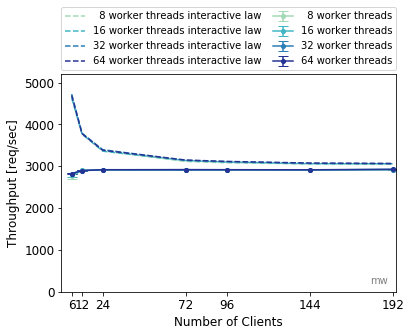

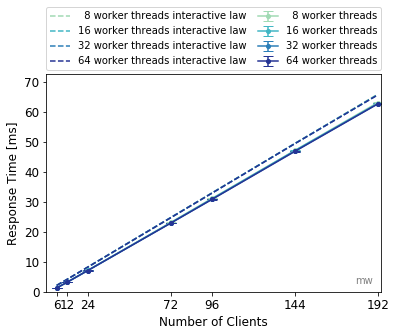

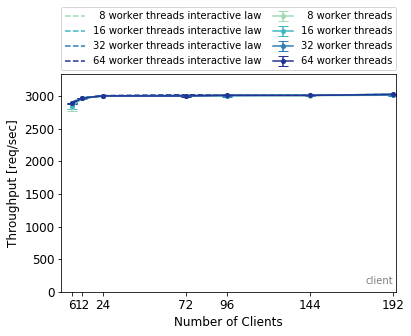

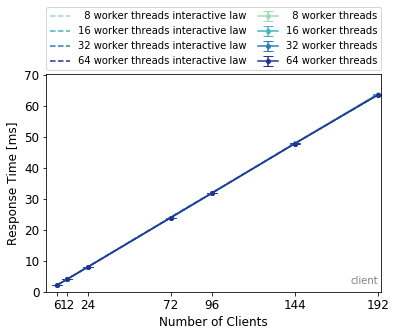

In [11]:
df_exp31_ro_mw = df_exp31_mw[df_exp31_mw['workload']=='read-only']

plots.ctrl.generate(plots.tp.nc_w, df_exp31_ro_mw, suite[exp_name], f"{exp_name}_ro_tp_nc_w") # throughput vs num_clients plot
plots.ctrl.generate(plots.rt.nc_w, df_exp31_ro_mw, suite[exp_name], f"{exp_name}_ro_rt_nc_w") # response time vs num_clients plot

df_exp31_ro_c = df_exp31_client[df_exp31_client['workload']=='read-only']
plots.ctrl.generate(plots.tp.nc_w, df_exp31_ro_c)
plots.ctrl.generate(plots.rt.nc_w, df_exp31_ro_c)

#### 3.1.1 Explanation

Write Only: 


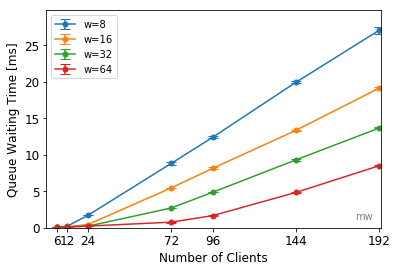

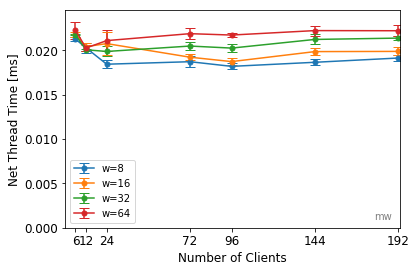

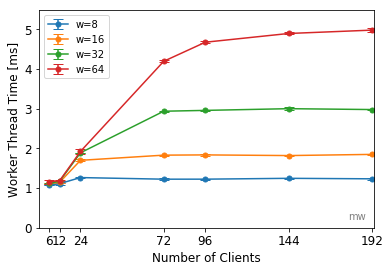

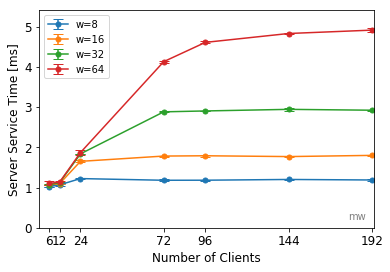

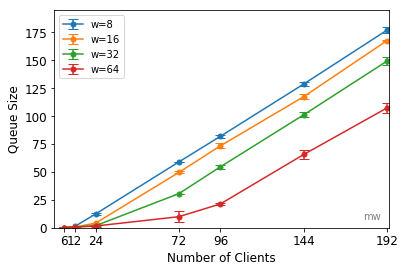

Read Only: 


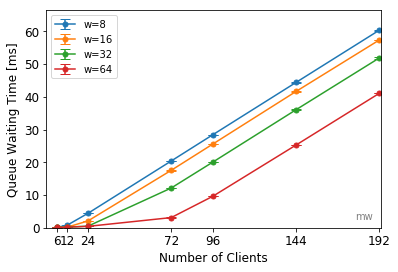

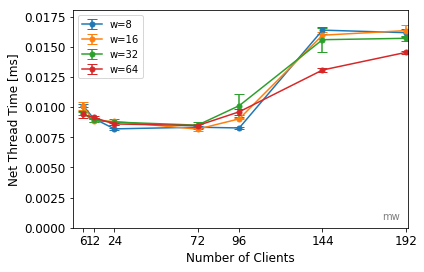

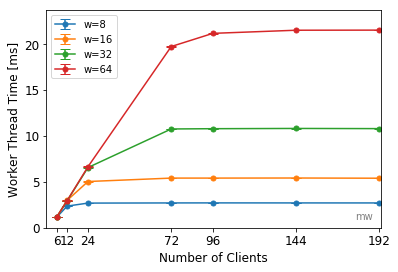

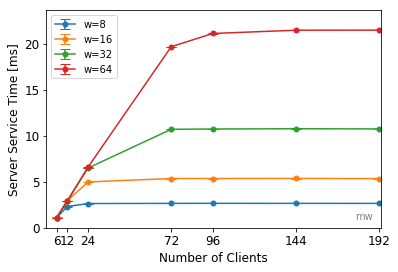

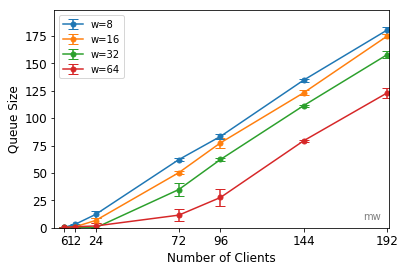

In [12]:
print("Write Only: ")
plots.ctrl.dashboard_nc(df_exp31_wo_mw)

print("Read Only: ")
plots.ctrl.dashboard_nc(df_exp31_ro_mw)

### 3.2 Two Middlewares

In [13]:
exp_name="exp32"
df_exp32_mw = queries.query_mw.load_df(suite=suite[exp_name], exp=exp_name)
df_exp32_client = queries.query_client.load_df(suite=suite[exp_name], exp=exp_name)

#### Write-Only

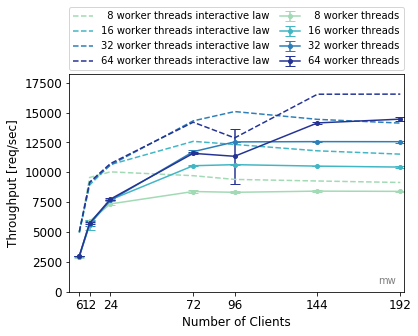

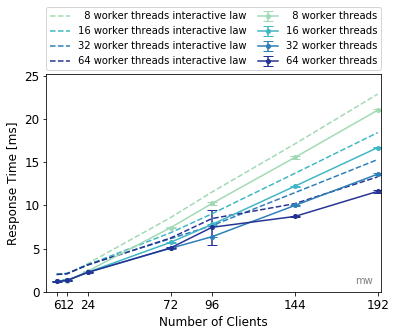

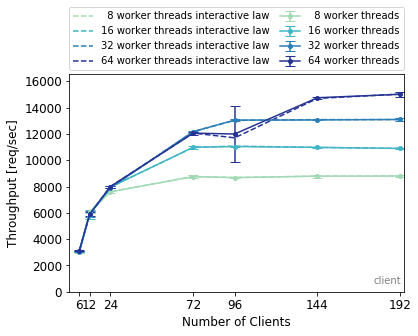

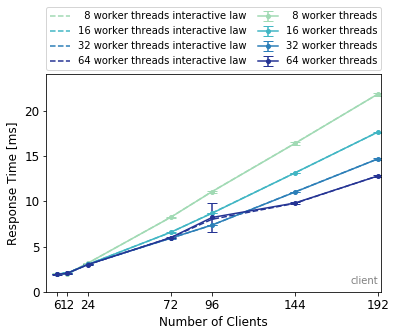

In [14]:
df_exp32_wo_mw = df_exp32_mw[df_exp32_mw['workload']=='write-only']
plots.ctrl.generate(plots.tp.nc_w, df_exp32_wo_mw, suite[exp_name], f"{exp_name}_wo_tp_nc_w") 
plots.ctrl.generate(plots.rt.nc_w, df_exp32_wo_mw, suite[exp_name], f"{exp_name}_wo_rt_nc_w") 

df_exp32_wo_c = df_exp32_client[df_exp32_client['workload']=='write-only']
plots.ctrl.generate(plots.tp.nc_w, df_exp32_wo_c)
plots.ctrl.generate(plots.rt.nc_w, df_exp32_wo_c)

#### Read-Only

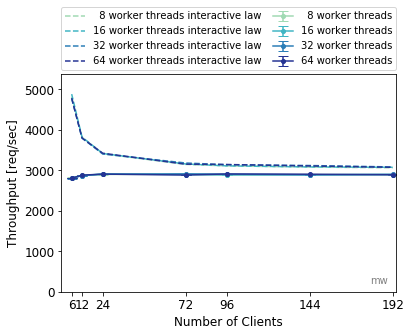

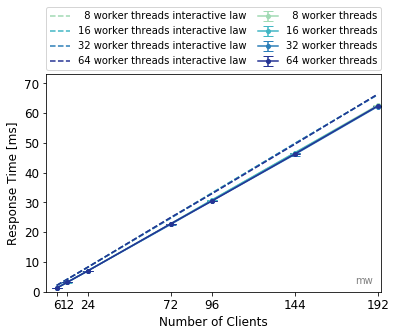

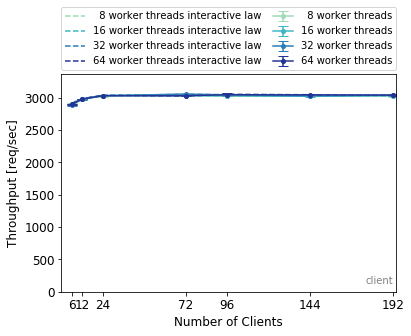

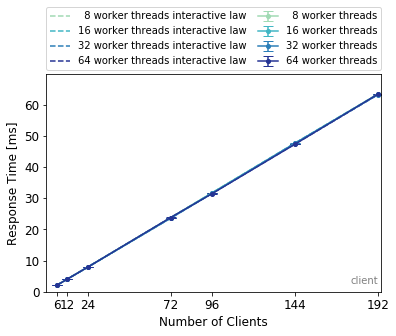

In [15]:
df_exp32_ro_mw = df_exp32_mw[df_exp32_mw['workload']=='read-only']
plots.ctrl.generate(plots.tp.nc_w, df_exp32_ro_mw, suite[exp_name], f"{exp_name}_ro_tp_nc_w") 
plots.ctrl.generate(plots.rt.nc_w, df_exp32_ro_mw, suite[exp_name], f"{exp_name}_ro_rt_nc_w")

df_exp32_ro_c = df_exp32_client[df_exp32_client['workload']=='read-only']
plots.ctrl.generate(plots.tp.nc_w, df_exp32_ro_c)
plots.ctrl.generate(plots.rt.nc_w, df_exp32_ro_c)

#### 3.2.1 Explanation

Write Only: 


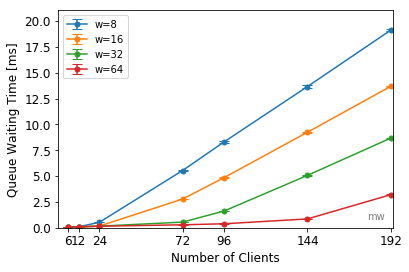

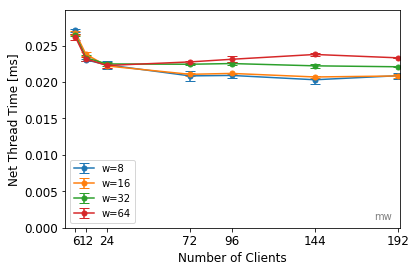

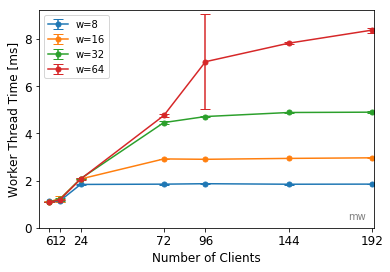

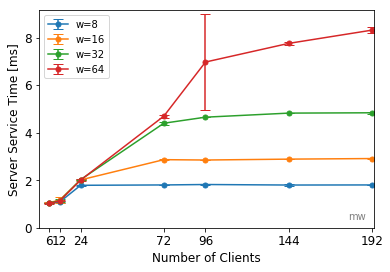

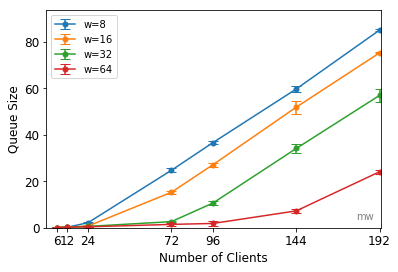

Read Only: 


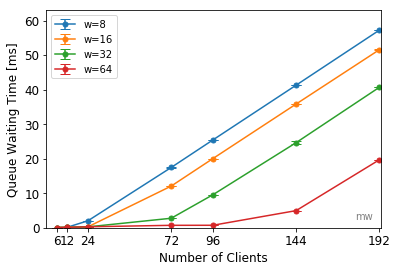

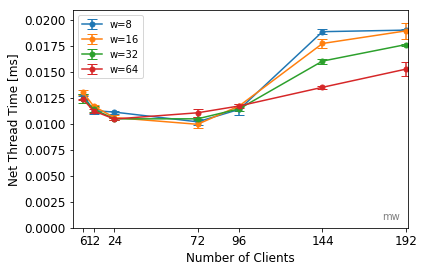

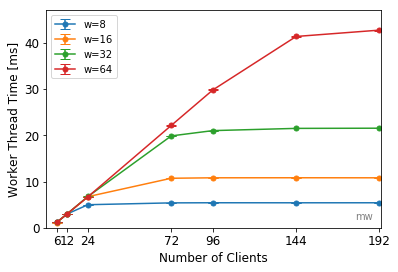

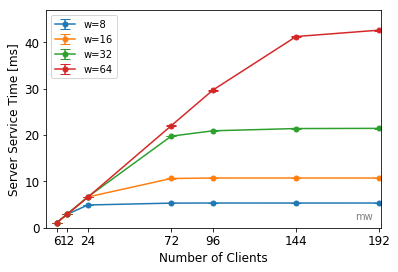

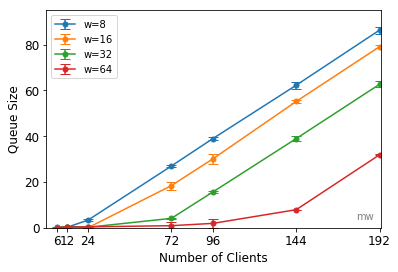

In [16]:
print("Write Only: ")
plots.ctrl.dashboard_nc(df_exp32_wo_mw)

print("Read Only: ")
plots.ctrl.dashboard_nc(df_exp32_ro_mw)

### 3.3 Summary

## 4. Throughput for Writes (90 pts)

### 4.1 Full System

In [17]:
exp_name="exp41"
df_exp41_mw = queries.query_mw.load_df(suite=suite[exp_name], exp=exp_name)
df_exp41_client = queries.query_client.load_df(suite=suite[exp_name], exp=exp_name)

#### Write-Only

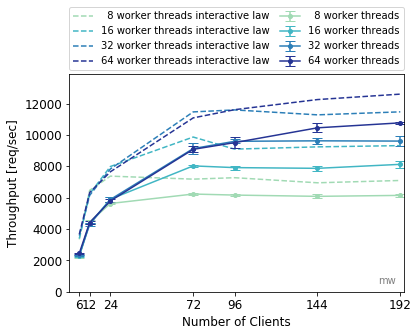

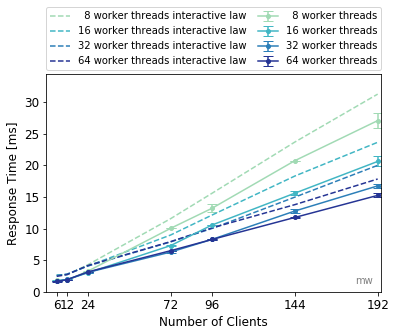

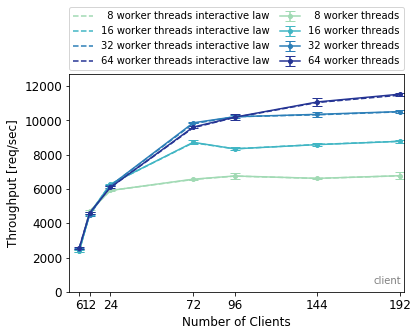

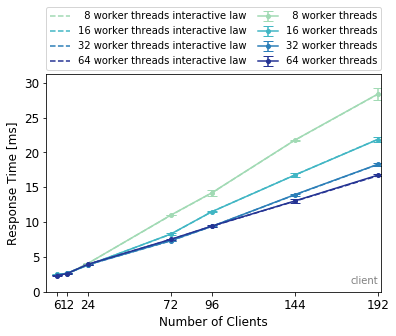

In [18]:
# no workload filtering

plots.ctrl.generate(plots.tp.nc_w, df_exp41_mw, suite[exp_name], f"{exp_name}_wo_tp_nc_w") 
plots.ctrl.generate(plots.rt.nc_w, df_exp41_mw, suite[exp_name], f"{exp_name}_wo_rt_nc_w")

plots.ctrl.generate(plots.tp.nc_w, df_exp41_client)
plots.ctrl.generate(plots.rt.nc_w, df_exp41_client)

#### 4.1.1 Explanation

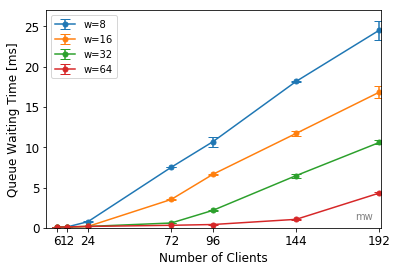

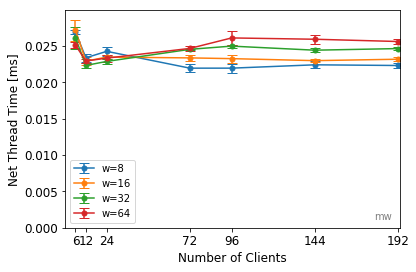

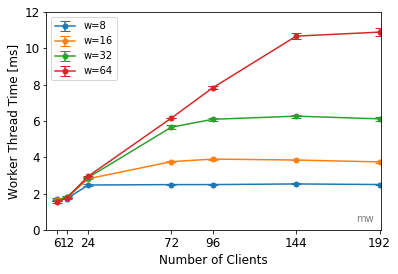

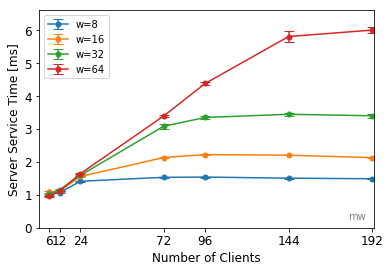

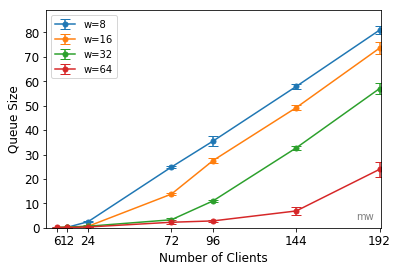

In [19]:
plots.ctrl.dashboard_nc(df_exp41_mw)

### 4.2 Summary

## 5. Gets and Multi-gets (90 pts)

### 5.1 Sharded-Case

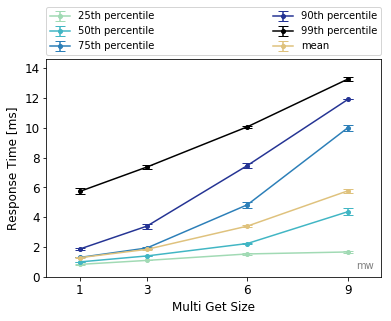

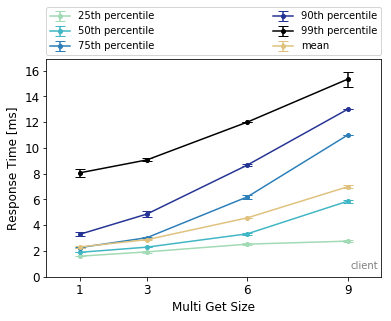

In [20]:
exp_name="exp51"

_, df_exp51_mw_qtm = queries.query_rthist_mw.load_df(suite=suite[exp_name], exp=exp_name)
_,df_exp51_client_qtm = queries.query_rthist_client.load_df(suite=suite[exp_name], exp=exp_name)

df_exp51_mw_qtm = df_exp51_mw_qtm[df_exp51_mw_qtm['op_type']=='get']
df_exp51_client_qtm = df_exp51_client_qtm[df_exp51_client_qtm['op_type']=='get']


plots.ctrl.generate(plots.rt.mget_perc, df_exp51_mw_qtm ) 
plots.ctrl.generate(plots.rt.mget_perc, df_exp51_client_qtm, suite[exp_name], f"{exp_name}_sharded_rt_mget_perc_client")


#### 5.1.1 Explanation

,num_clients,data_origin,n_server_vm,n_client_vm,n_vc,workload,workload_ratio,op_type,multi_get_behaviour,multi_get_size,n_worker_per_mw,n_middleware_vm,n_instances_mt_per_machine,n_threads_per_mt_instance,write_bandwidth_limit,bandwidth_limit_write_throughput,read_bandwidth_limit,bandwidth_limit_read_throughput,client_rtt,server_rtt,throughput_rep_mean,throughput_rep_std,rt_rep_mean,rt_rep_std
0,12,client,3,3,2,read-write,1:1,-,sharded,1,64,2,2,1,-,-,-,-,-,-,4611.290000,195.351622,2.608333,0.110504
1,12,client,3,3,2,read-write,1:3,-,sharded,3,64,2,2,1,-,-,-,-,-,-,4204.290000,82.476849,2.848333,0.056446
2,12,client,3,3,2,read-write,1:6,-,sharded,6,64,2,2,1,-,-,-,-,-,-,2907.176667,4.835104,4.125556,0.016188
3,12,client,3,3,2,read-write,1:9,-,sharded,9,64,2,2,1,-,-,-,-,-,-,2014.586667,20.857987,5.954444,0.065877


,data_origin,op_type,num_clients,n_server_vm,n_client_vm,n_vc,workload,workload_ratio,multi_get_behaviour,multi_get_size,n_worker_per_mw,n_middleware_vm,n_instances_mt_per_machine,n_threads_per_mt_instance,write_bandwidth_limit,bandwidth_limit_write_throughput,read_bandwidth_limit,bandwidth_limit_read_throughput,client_rtt,server_rtt,throughput_rep_mean,throughput_rep_std,rt_rep_mean,rt_rep_std,qwt_rep_mean,qwt_rep_std,ntt_rep_mean,ntt_rep_std,wtt_rep_mean,wtt_rep_std,sst0_rep_mean,sst0_rep_std,sst1_rep_mean,sst1_rep_std,sst2_rep_mean,sst2_rep_std,sst_rep_mean,sst_rep_std,queue_rep_mean,queue_rep_std
0,mw,get,12,3,3,2,read-write,1:1,sharded,1,64,2,2,1,-,-,-,-,-,-,2155.620513,170.011261,1.304487,0.053710,0.106614,0.001137,0.009532,0.000255,1.184948,0.052112,0.398664,0.037032,0.398758,0.008515,0.331676,0.004854,0.376366,0.016587,0.192308,0.133235
1,mw,mget,12,3,3,2,read-write,1:3,sharded,3,64,2,2,1,-,-,-,-,-,-,1963.091453,26.675030,1.873585,0.050445,0.115370,0.003560,0.009809,0.000259,1.748862,0.049755,1.162854,0.013386,1.239833,0.027616,1.034612,0.018684,1.145767,0.019778,0.236111,0.174741
2,mw,mget,12,3,3,2,read-write,1:6,sharded,6,64,2,2,1,-,-,-,-,-,-,1364.504274,48.042949,3.294246,0.112690,0.113562,0.002597,0.010489,0.000504,3.171203,0.112795,1.580318,0.053123,1.830242,0.161717,2.003333,0.329552,1.804631,0.066234,0.182692,0.143588
3,mw,mget,12,3,3,2,read-write,1:9,sharded,9,64,2,2,1,-,-,-,-,-,-,939.021795,6.867151,5.604430,0.124431,0.116332,0.002322,0.011226,0.000464,5.477430,0.126901,2.513906,0.435265,3.693907,0.588200,1.849700,0.421412,2.685838,0.069892,0.065171,0.043516


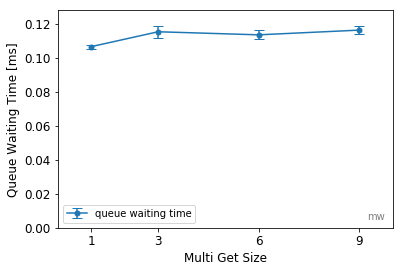

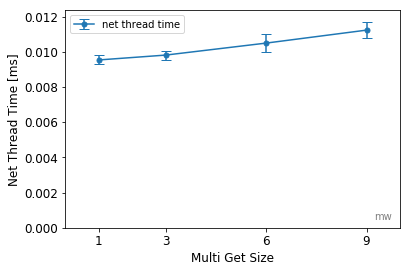

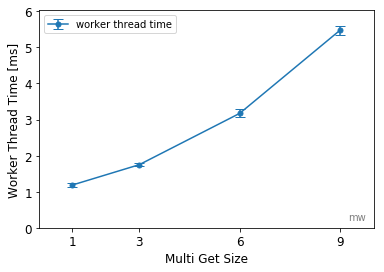

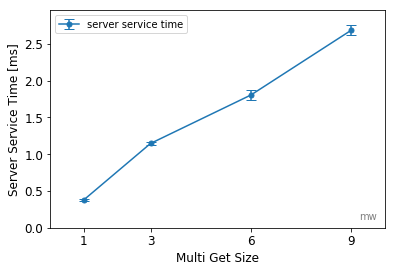

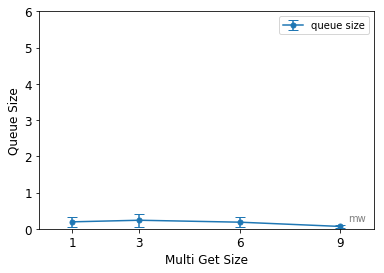

In [21]:
exp_name="exp51"
df_exp51_mw = queries.query_mw.load_df(suite=suite[exp_name], exp=exp_name)
df_exp51_mw = df_exp51_mw[(df_exp51_mw['op_type']=='get')|(df_exp51_mw['op_type']=='mget')]
df_exp51_client = queries.query_client.load_df(suite=suite[exp_name], exp=exp_name)

display(df_exp51_client)
display(df_exp51_mw)
plots.ctrl.dashboard_mget(df_exp51_mw)

### 5.2 Non-Sharded Case

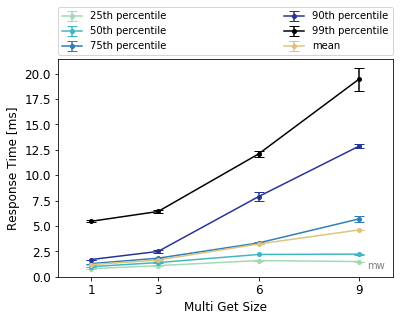

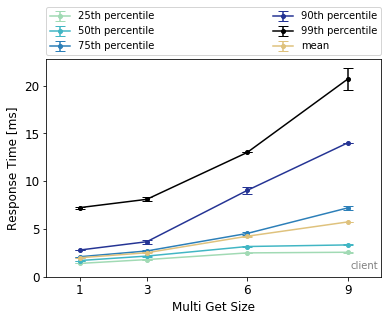

In [22]:
exp_name="exp52"

_, df_exp52_mw_qtm = queries.query_rthist_mw.load_df(suite=suite[exp_name], exp=exp_name)
_,df_exp52_client_qtm = queries.query_rthist_client.load_df(suite=suite[exp_name], exp=exp_name)

df_exp52_mw_qtm = df_exp52_mw_qtm[df_exp52_mw_qtm['op_type']=='get']
df_exp52_client_qtm = df_exp52_client_qtm[df_exp52_client_qtm['op_type']=='get']

plots.ctrl.generate(plots.rt.mget_perc, df_exp52_mw_qtm) 
plots.ctrl.generate(plots.rt.mget_perc, df_exp52_client_qtm, suite[exp_name], f"{exp_name}_nonsharded_rt_mget_perc_client")

#### 5.2.1 Explanation

,data_origin,op_type,num_clients,n_server_vm,n_client_vm,n_vc,workload,workload_ratio,multi_get_behaviour,multi_get_size,n_worker_per_mw,n_middleware_vm,n_instances_mt_per_machine,n_threads_per_mt_instance,write_bandwidth_limit,bandwidth_limit_write_throughput,read_bandwidth_limit,bandwidth_limit_read_throughput,client_rtt,server_rtt,throughput_rep_mean,throughput_rep_std,rt_rep_mean,rt_rep_std,qwt_rep_mean,qwt_rep_std,ntt_rep_mean,ntt_rep_std,wtt_rep_mean,wtt_rep_std,sst0_rep_mean,sst0_rep_std,sst1_rep_mean,sst1_rep_std,sst2_rep_mean,sst2_rep_std,sst_rep_mean,sst_rep_std,queue_rep_mean,queue_rep_std
0,mw,get,12,3,3,2,read-write,1:1,non-sharded,1,64,2,2,1,599.45,18293.762207,299.15,9129.333496,1.483,1.680167,2572.487179,23.714921,1.213511,0.007521,0.088787,0.002515,0.010276,0.000249,1.112775,0.006486,0.380924,0.002261,0.290446,0.002537,0.379640,0.008222,0.350337,0.002163,0.205128,0.096793
1,mw,mget,12,3,3,2,read-write,1:3,non-sharded,3,64,2,2,1,599.45,18293.762207,299.15,9129.333496,1.483,1.680167,2233.948718,82.896657,1.669651,0.062220,0.087795,0.000434,0.011681,0.000252,1.568713,0.061673,0.554667,0.051356,0.428531,0.007197,0.519560,0.005811,0.500919,0.020644,0.192308,0.066617
2,mw,mget,12,3,3,2,read-write,1:6,non-sharded,6,64,2,2,1,599.45,18293.762207,299.15,9129.333496,1.483,1.680167,1415.610256,1.323554,3.197470,0.038727,0.090529,0.004307,0.012242,0.000414,3.091723,0.035428,0.861324,0.166705,1.315289,0.406360,0.835161,0.266772,1.003925,0.011769,0.115385,0.066617
3,mw,mget,12,3,3,2,read-write,1:9,non-sharded,9,64,2,2,1,599.45,18293.762207,299.15,9129.333496,1.483,1.680167,961.800000,1.840568,4.601613,0.042427,0.103170,0.000315,0.013847,0.000354,4.479582,0.043075,0.789515,0.218704,2.633833,0.390382,0.957985,0.236762,1.460445,0.014282,0.064103,0.022206


,num_clients,data_origin,n_server_vm,n_client_vm,n_vc,workload,workload_ratio,op_type,multi_get_behaviour,multi_get_size,n_worker_per_mw,n_middleware_vm,n_instances_mt_per_machine,n_threads_per_mt_instance,write_bandwidth_limit,bandwidth_limit_write_throughput,read_bandwidth_limit,bandwidth_limit_read_throughput,client_rtt,server_rtt,throughput_rep_mean,throughput_rep_std,rt_rep_mean,rt_rep_std
0,12,client,3,3,2,read-write,1:1,-,non-sharded,1,64,2,2,1,599.45,18293.762207,299.15,9129.333496,1.483,1.680167,5326.756667,34.784655,2.248889,0.014369
1,12,client,3,3,2,read-write,1:3,-,non-sharded,3,64,2,2,1,599.45,18293.762207,299.15,9129.333496,1.483,1.680167,4661.000000,146.997186,2.575556,0.091687
2,12,client,3,3,2,read-write,1:6,-,non-sharded,6,64,2,2,1,599.45,18293.762207,299.15,9129.333496,1.483,1.680167,2927.990000,2.342499,4.090000,0.001667
3,12,client,3,3,2,read-write,1:9,-,non-sharded,9,64,2,2,1,599.45,18293.762207,299.15,9129.333496,1.483,1.680167,2001.360000,4.539207,5.985000,0.014530


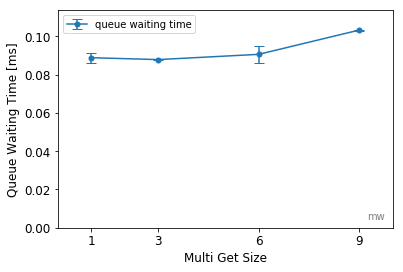

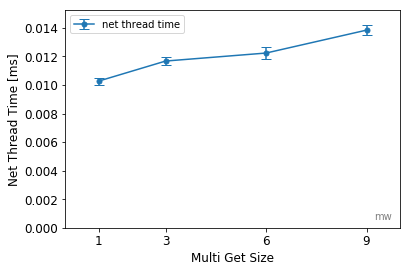

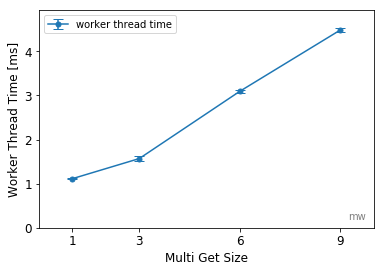

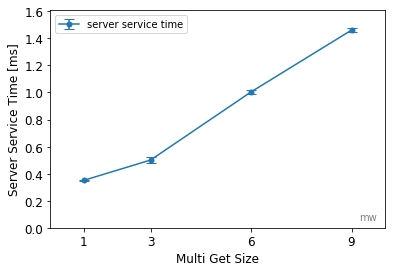

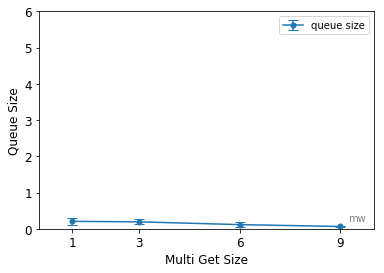

In [23]:
exp_name="exp52"
df_exp52_mw = queries.query_mw.load_df(suite=suite[exp_name], exp=exp_name)
df_exp52_mw = df_exp52_mw[(df_exp52_mw['op_type']=='get')|(df_exp52_mw['op_type']=='mget')]

df_exp52_client = queries.query_client.load_df(suite=suite[exp_name], exp=exp_name)
display(df_exp52_mw)
display(df_exp52_client)

plots.ctrl.dashboard_mget(df_exp52_mw)

### 5.3 Histogram

Sharded:


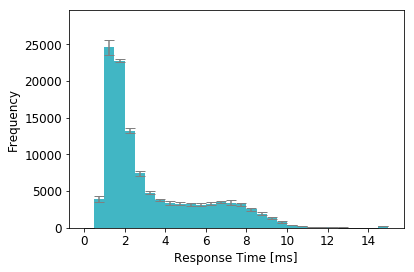

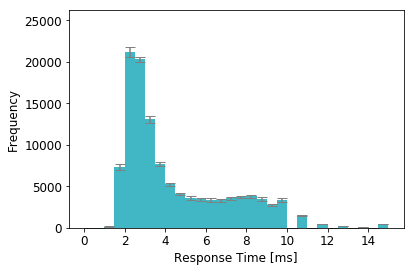

Non-Sharded:


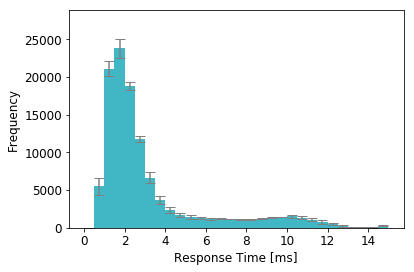

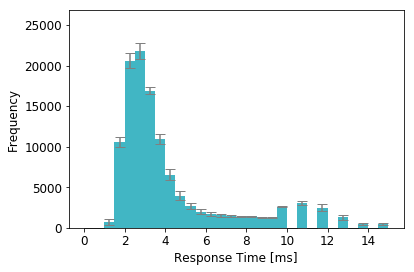

In [24]:
mget_size = 6
bin_size = 0.5
bin_max = 15.0

# TODO [nku] allow setting bin size and y_lim from here
# TODO [nku] display different # of ops due to rounding
# TODO [nku] outlier handling
# TODO [nku] see what Freedman–Diaconis rule: binsize = 2 * IQR(x) * n^(-1/3) would choose for a bin size

exp_name = "exp51"
df_rep_exp51_mw = queries.query_rthist_mw.load_df_by_rep(suite=suite[exp_name], exp=exp_name)
df_rep_exp51_client = queries.query_rthist_client.load_df_by_rep(suite=suite[exp_name], exp=exp_name)

exp_name = "exp52"
df_rep_exp52_mw = queries.query_rthist_mw.load_df_by_rep(suite=suite[exp_name], exp=exp_name)
df_rep_exp52_client = queries.query_rthist_client.load_df_by_rep(suite=suite[exp_name], exp=exp_name)


df_rep_exp51_mw = df_rep_exp51_mw[(df_rep_exp51_mw['multi_get_size']==mget_size)&(df_rep_exp51_mw['op_type']=="get")]
df_rep_exp51_client = df_rep_exp51_client[(df_rep_exp51_client['multi_get_size']==mget_size)&(df_rep_exp51_client['op_type']=="get")]

df_rep_exp52_mw = df_rep_exp52_mw[(df_rep_exp52_mw['multi_get_size']==mget_size)&(df_rep_exp52_mw['op_type']=="get")]
df_rep_exp52_client = df_rep_exp52_client[(df_rep_exp52_client['multi_get_size']==mget_size)&(df_rep_exp52_client['op_type']=="get")]



df_hist_exp51_mw = queries.hist_stats.aggregate_hist(df_rep_exp51_mw, bin_size=bin_size, bin_max=bin_max)
df_hist_exp51_client = queries.hist_stats.aggregate_hist(df_rep_exp51_client, bin_size=bin_size, bin_max=bin_max)
df_hist_exp52_mw = queries.hist_stats.aggregate_hist(df_rep_exp52_mw, bin_size=bin_size, bin_max=bin_max)
df_hist_exp52_client = queries.hist_stats.aggregate_hist(df_rep_exp52_client, bin_size=bin_size, bin_max=bin_max)

print("Sharded:")
plots.ctrl.generate(plots.rt.mget_hist, df_hist_exp51_mw, suite[exp_name], f"exp51_sharded_mget6_hist_mw")
plots.ctrl.generate(plots.rt.mget_hist, df_hist_exp51_client, suite[exp_name], f"exp51_sharded_mget6_hist_client")

print("Non-Sharded:")
plots.ctrl.generate(plots.rt.mget_hist, df_hist_exp52_mw, suite[exp_name], f"exp52_nonsharded_mget6_hist_mw")
plots.ctrl.generate(plots.rt.mget_hist, df_hist_exp52_client, suite[exp_name], f"exp52_nonsharded_mget6_hist_client")


### 5.4 Summary

## 6. 2K Analysis (90 pts)

In [25]:
exp_name="exp60"
r_rep = 3
df_exp60_mw = queries.query_mw.load_df(suite=suite[exp_name], exp=exp_name)


d = {
    'n_server_vm':('S', {'1':-1, '3':1}),
    'n_middleware_vm':('M', {'1':-1, '2':1}),
    'n_worker_per_mw':('W', {'8':-1, '32':1})
}
df_exp60_base_mw = queries.query_2k.load_2k_base_df(suite, exp_name, r_rep=r_rep, factor_map=d, data_origin='mw')
df_exp60_base_client = queries.query_2k.load_2k_base_df(suite, exp_name, r_rep=r_rep, factor_map=d, data_origin='client')

#### Write-Only

In [26]:
print('MW: ')
df_exp60_base_wo_mw = df_exp60_base_mw[df_exp60_base_mw['workload']=='write-only']
display(df_exp60_base_wo_mw)
latex_str = plots.table_2k.base_2k_to_latex(df=df_exp60_base_wo_mw)
plots.ctrl.generate_latex(latex_str, 
                          suite=suite[exp_name], 
                          name=f"{exp_name}_wo_2k_base")


df_exp60_effect_wo_mw, rt_info_exp60_wo_mw, tp_info_exp60_wo_mw = queries.query_2k.load_2k_effect_df(df_exp60_base_wo_mw, r_rep=r_rep, factor_map=d)
print(rt_info_exp60_wo_mw)
print(tp_info_exp60_wo_mw)
display(df_exp60_effect_wo_mw)
latex_str = plots.table_2k.effect_2k_to_latex(df=df_exp60_effect_wo_mw, 
                                          tp_info=tp_info_exp60_wo_mw, 
                                          rt_info=rt_info_exp60_wo_mw)
plots.ctrl.generate_latex(latex_str, 
                          suite=suite[exp_name], 
                          name=f"{exp_name}_wo_2k_effect")


MW: 


,data_origin,workload,n_server_vm,n_middleware_vm,n_worker_per_mw,I,S,M,W,S-M,S-W,M-W,S-M-W,rt_y1,rt_y2,rt_y3,rt_y_avg,rt_e1,rt_e2,rt_e3,tp_y1,tp_y2,tp_y3,tp_y_avg,tp_e1,tp_e2,tp_e3
10,mw,write-only,1,1,8,1,-1,-1,-1,1,1,1,-1,28.628251,28.509880,28.739677,28.625936,0.002315,-0.116056,0.113741,6248.092308,6306.123077,6261.953846,6272.056410,-23.964103,34.066667,-10.102564
14,mw,write-only,3,1,8,1,1,-1,-1,-1,-1,1,1,33.810379,34.186527,35.495985,34.497630,-0.687251,-0.311103,0.998355,5293.323077,5110.184615,5066.307692,5156.605128,136.717949,-46.420513,-90.297436
11,mw,write-only,1,2,8,1,-1,1,-1,-1,1,-1,1,21.380828,21.160742,21.216155,21.252575,0.128253,-0.091833,-0.036420,8211.538462,8211.215385,8210.061538,8210.938462,0.600000,0.276923,-0.876923
15,mw,write-only,3,2,8,1,1,1,-1,1,-1,-1,-1,25.721376,24.691712,25.920973,25.444687,0.276689,-0.752975,0.476286,6717.692308,6584.769231,6784.076923,6695.512821,22.179487,-110.743590,88.564103
8,mw,write-only,1,1,32,1,-1,-1,1,1,-1,-1,1,15.958086,17.534072,17.439215,16.977124,-1.019038,0.556948,0.462090,9474.292308,9964.169231,9996.538462,9811.666667,-337.374359,152.502564,184.871795
12,mw,write-only,3,1,32,1,1,-1,1,-1,1,-1,-1,22.188884,22.235100,22.369361,22.264448,-0.075565,-0.029348,0.104913,7734.353846,7706.753846,7639.246154,7693.451282,40.902564,13.302564,-54.205128
9,mw,write-only,1,2,32,1,-1,1,1,-1,-1,1,-1,13.739240,13.784873,13.104586,13.542899,0.196340,0.241973,-0.438313,12300.046154,12250.138462,11909.338462,12153.174359,146.871795,96.964103,-243.835897
13,mw,write-only,3,2,32,1,1,1,1,1,1,1,1,16.350983,17.116640,15.982032,16.483218,-0.132235,0.633422,-0.501187,9207.738462,9864.400000,9589.061538,9553.733333,-345.994872,310.666667,35.328205


Using t-value: 1.746
{'NAME': 'response time', 'Y_MEAN_MEAN': 22.386064764440903, 'SSY': 13048.036888810027, 'SST': 1020.7753935042076, 'SSE': 5.027660055824014, 'STD_DEV_ERROR': 0.560561105936722, 'STD_DEV_EFFECT': 0.1144240565995996, 'PERCENTAGE_OF_VARIATION_ERROR': 0.4925334297650553}
{'NAME': 'throughput', 'Y_MEAN_MEAN': 8193.392307692307, 'SSY': 1718365786.171361, 'SST': 107205525.98532547, 'SSE': 535385.9064299827, 'STD_DEV_ERROR': 182.92517364177607, 'STD_DEV_EFFECT': 37.33944471103019, 'PERCENTAGE_OF_VARIATION_ERROR': 0.4994014081916519}


,I_rt,S_rt,M_rt,W_rt,S-M_rt,S-W_rt,M-W_rt,S-M-W_rt,I_tp,S_tp,M_tp,W_tp,S-M_tp,S-W_tp,M-W_tp,S-M-W_tp
count,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000e+00,8.000000e+00,8.000000e+00,8.000000e+00,8.000000,8.000000e+00,8.000000,8.000000
total,179.088518,18.291449,-25.641760,-40.553138,-4.026587,-1.836163,7.210850,-0.667424,6.554714e+04,-7.348533e+03,7.679579e+03,1.287691e+04,-881.200000,-2.086779e+03,724.000000,-81.251282
effect,22.386065,2.286431,-3.205220,-5.069142,-0.503323,-0.229520,0.901356,-0.083428,8.193392e+03,-9.185667e+02,9.599474e+02,1.609614e+03,-110.150000,-2.608474e+02,90.500000,-10.156410
SSj,12027.261495,125.466414,246.562437,616.708866,6.080027,1.264310,19.498633,0.167045,1.611160e+09,2.025035e+07,2.211598e+07,6.218058e+07,291192.540000,1.632993e+06,196566.000000,2475.664063
percentage_of_variation_effect,NaN,12.291285,24.154426,60.415726,0.595628,0.123858,1.910179,0.016365,NaN,1.888928e+01,2.062951e+01,5.800128e+01,0.271621,1.523236e+00,0.183354,0.002309
confidence_interval_low,22.186280,2.086647,-3.405004,-5.268927,-0.703108,-0.429305,0.701572,-0.283212,8.128198e+03,-9.837613e+02,8.947528e+02,1.544419e+03,-175.344670,-3.260421e+02,25.305330,-75.351081
confidence_interval_high,22.585849,2.486216,-3.005436,-4.869358,-0.303539,-0.029736,1.101141,0.116356,8.258587e+03,-8.533720e+02,1.025142e+03,1.674809e+03,-44.955330,-1.956528e+02,155.694670,55.038260
significant,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000,1.000000e+00,1.000000,0.000000


In [27]:
print('Client: ')
df_exp60_base_wo_client = df_exp60_base_client[df_exp60_base_client['workload']=='write-only']
display(df_exp60_base_wo_client)
df_exp60_effect_wo_client, rt_info_exp60_wo_client, tp_info_exp60_wo_client = queries.query_2k.load_2k_effect_df(df_exp60_base_wo_client, r_rep=r_rep, factor_map=d)
print(rt_info_exp60_wo_client)
print(tp_info_exp60_wo_client)
display(df_exp60_effect_wo_client)

Client: 


,data_origin,workload,n_server_vm,n_middleware_vm,n_worker_per_mw,I,S,M,W,S-M,S-W,M-W,S-M-W,rt_y1,rt_y2,rt_y3,rt_y_avg,rt_e1,rt_e2,rt_e3,tp_y1,tp_y2,tp_y3,tp_y_avg,tp_e1,tp_e2,tp_e3
6,client,write-only,1,1,8,1,-1,-1,-1,1,1,1,-1,29.223333,29.206667,29.266667,29.232222,-0.008889,-0.025556,0.034444,6568.45,6572.90,6558.75,6566.700000,1.750000,6.200000,-7.950000
14,client,write-only,3,1,8,1,1,-1,-1,-1,-1,1,1,34.576667,35.380000,36.203333,35.386667,-0.810000,-0.006667,0.816667,5552.14,5426.53,5281.28,5419.983333,132.156667,6.546667,-138.703333
7,client,write-only,1,2,8,1,-1,1,-1,-1,1,-1,1,22.551667,22.263333,22.428333,22.414444,0.137222,-0.151111,0.013889,8553.33,8670.81,8603.51,8609.216667,-55.886667,61.593333,-5.706667
15,client,write-only,3,2,8,1,1,1,-1,1,-1,-1,-1,26.735000,25.990000,26.988333,26.571111,0.163889,-0.581111,0.417222,7224.37,7447.44,7161.48,7277.763333,-53.393333,169.676667,-116.283333
4,client,write-only,1,1,32,1,-1,-1,1,1,-1,-1,1,17.853333,18.660000,18.576667,18.363333,-0.510000,0.296667,0.213333,10753.75,10291.75,10336.43,10460.643333,293.106667,-168.893333,-124.213333
12,client,write-only,3,1,32,1,1,-1,1,-1,1,-1,-1,23.850000,23.913333,24.180000,23.981111,-0.131111,-0.067778,0.198889,8050.56,8027.63,7938.71,8005.633333,44.926667,21.996667,-66.923333
5,client,write-only,1,2,32,1,-1,1,1,-1,-1,1,-1,14.921667,15.018333,14.740000,14.893333,0.028333,0.125000,-0.153333,12901.54,12848.45,13059.10,12936.363333,-34.823333,-87.913333,122.736667
13,client,write-only,3,2,32,1,1,1,1,1,1,1,1,18.475000,18.340000,17.681667,18.165556,0.309444,0.174444,-0.483889,10411.55,10488.89,10827.00,10575.813333,-164.263333,-86.923333,251.186667


Using t-value: 1.746
{'NAME': 'response time', 'Y_MEAN_MEAN': 23.62597222222222, 'SSY': 14340.584966666665, 'SST': 944.1074439814815, 'SSE': 2.7607259259259447, 'STD_DEV_ERROR': 0.4153858090623361, 'STD_DEV_EFFECT': 0.08479027321632367, 'PERCENTAGE_OF_VARIATION_ERROR': 0.29241649809299625}
{'NAME': 'throughput', 'Y_MEAN_MEAN': 8731.514583333334, 'SSY': 1957231749.8230999, 'SST': 127487423.76799583, 'SSE': 347448.9978666673, 'STD_DEV_ERROR': 147.36201127382424, 'STD_DEV_EFFECT': 30.08014459092763, 'PERCENTAGE_OF_VARIATION_ERROR': 0.2725359000892213}


,I_rt,S_rt,M_rt,W_rt,S-M_rt,S-W_rt,M-W_rt,S-M-W_rt,I_tp,S_tp,M_tp,W_tp,S-M_tp,S-W_tp,M-W_tp,S-M-W_tp
count,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000e+00,8.000000e+00,8.000000e+00,8.000000e+00,8.000000,8.000000e+00,8.000000,8.000000
total,189.007778,19.201111,-24.918889,-38.201111,-4.343333,-1.421111,6.347778,-0.347778,6.985212e+04,-7.293730e+03,8.946197e+03,1.410479e+04,-90.276667,-2.337390e+03,1145.603333,279.196667
effect,23.625972,2.400139,-3.114861,-4.775139,-0.542917,-0.177639,0.793472,-0.043472,8.731515e+03,-9.117163e+02,1.118275e+03,1.763099e+03,-11.284583,-2.921738e+02,143.200417,34.899583
SSj,13396.477523,138.256000,232.856634,547.246834,7.074204,0.757334,15.110356,0.045356,1.829744e+09,1.994944e+07,3.001291e+07,7.460441e+07,3056.203704,2.048772e+06,492152.624004,29231.542004
percentage_of_variation_effect,NaN,14.644096,24.664209,57.964466,0.749301,0.080217,1.600491,0.004804,NaN,1.564816e+01,2.354186e+01,5.851904e+01,0.002397,1.607039e+00,0.386040,0.022929
confidence_interval_low,23.477928,2.252095,-3.262905,-4.923183,-0.690960,-0.325683,0.645428,-0.191516,8.678995e+03,-9.642362e+02,1.065755e+03,1.710579e+03,-63.804516,-3.446937e+02,90.680484,-17.620349
confidence_interval_high,23.774016,2.548183,-2.966817,-4.627095,-0.394873,-0.029595,0.941516,0.104572,8.784035e+03,-8.591963e+02,1.170795e+03,1.815619e+03,41.235349,-2.396538e+02,195.720349,87.419516
significant,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,0.000000,1.000000e+00,1.000000,0.000000


#### Read-Only

In [28]:
print('MW: ')
df_exp60_base_ro_mw = df_exp60_base_mw[df_exp60_base_mw['workload']=='read-only']
display(df_exp60_base_ro_mw)
latex_str = plots.table_2k.base_2k_to_latex(df=df_exp60_base_ro_mw)
plots.ctrl.generate_latex(latex_str, 
                          suite=suite[exp_name], 
                          name=f"{exp_name}_ro_2k_base")


df_exp60_effect_ro_mw, rt_info_exp60_ro_mw, tp_info_exp60_ro_mw = queries.query_2k.load_2k_effect_df(df_exp60_base_ro_mw, r_rep=r_rep, factor_map=d)
print(rt_info_exp60_ro_mw)
print(tp_info_exp60_ro_mw)
display(df_exp60_effect_ro_mw)
latex_str = plots.table_2k.effect_2k_to_latex(df=df_exp60_effect_ro_mw, 
                                          tp_info=tp_info_exp60_ro_mw, 
                                          rt_info=rt_info_exp60_ro_mw)
plots.ctrl.generate_latex(latex_str, 
                          suite=suite[exp_name], 
                          name=f"{exp_name}_ro_2k_effect")

MW: 


,data_origin,workload,n_server_vm,n_middleware_vm,n_worker_per_mw,I,S,M,W,S-M,S-W,M-W,S-M-W,rt_y1,rt_y2,rt_y3,rt_y_avg,rt_e1,rt_e2,rt_e3,tp_y1,tp_y2,tp_y3,tp_y_avg,tp_e1,tp_e2,tp_e3
2,mw,read-only,1,1,8,1,-1,-1,-1,1,1,1,-1,63.008013,63.123237,63.047335,63.059528,-0.051515,0.063709,-0.012194,2890.384615,2895.492308,2897.600000,2894.492308,-4.107692,1.000000,3.107692
6,mw,read-only,3,1,8,1,1,-1,-1,-1,-1,1,1,21.617782,21.501864,21.599473,21.573039,0.044742,-0.071176,0.026433,7779.461538,8234.215385,8203.307692,8072.328205,-292.866667,161.887179,130.979487
3,mw,read-only,1,2,8,1,-1,1,-1,-1,1,-1,1,62.279876,60.143292,62.557697,61.660288,0.619588,-1.516996,0.897408,2878.784615,2789.523077,2878.800000,2849.035897,29.748718,-59.512821,29.764103
7,mw,read-only,3,2,8,1,1,1,-1,1,-1,-1,-1,18.547072,20.139157,19.688723,19.458317,-0.911245,0.680839,0.230406,8338.600000,8609.723077,8481.430769,8476.584615,-137.984615,133.138462,4.846154
0,mw,read-only,1,1,32,1,-1,-1,1,1,-1,-1,1,62.821964,61.843495,62.680867,62.448775,0.373189,-0.605280,0.232091,2903.307692,2904.953846,2896.430769,2901.564103,1.743590,3.389744,-5.133333
4,mw,read-only,3,1,32,1,1,-1,1,-1,1,-1,-1,20.092942,19.613745,20.123495,19.943394,0.149548,-0.329649,0.180101,8692.830769,8685.615385,8692.815385,8690.420513,2.410256,-4.805128,2.394872
1,mw,read-only,1,2,32,1,-1,1,1,-1,-1,1,-1,62.112797,61.630725,61.718737,61.820753,0.292044,-0.190028,-0.102016,2884.907692,2877.323077,2868.323077,2876.851282,8.056410,0.471795,-8.528205
5,mw,read-only,3,2,32,1,1,1,1,1,1,1,1,18.839093,19.053501,19.756472,19.216355,-0.377262,-0.162854,0.540116,8635.076923,8620.800000,8613.492308,8623.123077,11.953846,-2.323077,-9.630769


Using t-value: 1.746
{'NAME': 'response time', 'Y_MEAN_MEAN': 41.147556420961415, 'SSY': 51339.70674465786, 'SST': 10704.793158668992, 'SSE': 6.167485104763355, 'STD_DEV_ERROR': 0.6208605471824649, 'STD_DEV_EFFECT': 0.12673262850184994, 'PERCENTAGE_OF_VARIATION_ERROR': 0.05761423890538961}
{'NAME': 'throughput', 'Y_MEAN_MEAN': 5673.05, 'SSY': 960432923.131361, 'SST': 188029011.87136096, 'SSE': 171717.67037475316, 'STD_DEV_ERROR': 103.59707717123139, 'STD_DEV_EFFECT': 21.146664826104054, 'PERCENTAGE_OF_VARIATION_ERROR': 0.09132509322137633}


,I_rt,S_rt,M_rt,W_rt,S-M_rt,S-W_rt,M-W_rt,S-M-W_rt,I_tp,S_tp,M_tp,W_tp,S-M_tp,S-W_tp,M-W_tp,S-M-W_tp
count,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000e+00,8.000000e+00,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000
total,329.180451,-168.798239,-4.869024,-2.321896,-0.814498,-1.421319,2.158901,0.616465,4.538440e+04,2.234051e+04,266.789744,799.517949,407.128205,729.743590,-450.810256,-492.297436
effect,41.147556,-21.099780,-0.608628,-0.290237,-0.101812,-0.177665,0.269863,0.077058,5.673050e+03,2.792564e+03,33.348718,99.939744,50.891026,91.217949,-56.351282,-61.537179
SSj,40634.913586,10684.817038,8.890272,2.021700,0.248778,0.757555,1.747820,0.142511,7.724039e+08,1.871619e+08,26691.287732,239710.856371,62157.515779,199697.140039,76211.207732,90883.787022
percentage_of_variation_effect,NaN,99.813391,0.083049,0.018886,0.002324,0.007077,0.016327,0.001331,NaN,9.953886e+01,0.014195,0.127486,0.033057,0.106205,0.040532,0.048335
confidence_interval_low,40.926281,-21.321055,-0.829903,-0.511512,-0.323087,-0.398940,0.048587,-0.144217,5.636128e+03,2.755642e+03,-3.573359,63.017667,13.968949,54.295872,-93.273359,-98.459256
confidence_interval_high,41.368832,-20.878505,-0.387353,-0.068962,0.119463,0.043610,0.491138,0.298333,5.709972e+03,2.829486e+03,70.270795,136.861820,87.813102,128.140026,-19.429205,-24.615103
significant,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000,1.000000e+00,1.000000e+00,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [29]:
print('Client: ')
df_exp60_base_ro_client = df_exp60_base_client[df_exp60_base_client['workload']=='read-only']
display(df_exp60_base_ro_client)
df_exp60_effect_ro_client, rt_info_exp60_ro_client, tp_info_exp60_ro_client = queries.query_2k.load_2k_effect_df(df_exp60_base_ro_client, r_rep=r_rep, factor_map=d)
print(rt_info_exp60_ro_client)
print(tp_info_exp60_ro_client)
display(df_exp60_effect_ro_client)

Client: 


,data_origin,workload,n_server_vm,n_middleware_vm,n_worker_per_mw,I,S,M,W,S-M,S-W,M-W,S-M-W,rt_y1,rt_y2,rt_y3,rt_y_avg,rt_e1,rt_e2,rt_e3,tp_y1,tp_y2,tp_y3,tp_y_avg,tp_e1,tp_e2,tp_e3
2,client,read-only,1,1,8,1,-1,-1,-1,1,1,1,-1,63.740000,63.880000,63.833333,63.817778,-0.077778,0.062222,0.015556,3011.85,3017.95,3007.34,3012.380000,-0.530000,5.570000,-5.040000
10,client,read-only,3,1,8,1,1,-1,-1,-1,-1,1,1,23.073333,22.470000,22.440000,22.661111,0.412222,-0.191111,-0.221111,8318.01,8577.84,8551.53,8482.460000,-164.450000,95.380000,69.070000
3,client,read-only,1,2,8,1,-1,1,-1,-1,1,-1,1,63.305000,61.950000,63.440000,62.898333,0.406667,-0.948333,0.541667,3046.52,3103.54,3017.46,3055.840000,-9.320000,47.700000,-38.380000
11,client,read-only,3,2,8,1,1,1,-1,1,-1,-1,-1,20.321667,21.231667,20.793333,20.782222,-0.460556,0.449444,0.011111,9532.50,9087.63,9321.89,9314.006667,218.493333,-226.376667,7.883333
0,client,read-only,1,1,32,1,-1,-1,1,1,-1,-1,1,63.746667,62.083333,63.710000,63.180000,0.566667,-1.096667,0.530000,3012.55,3093.38,3013.73,3039.886667,-27.336667,53.493333,-26.156667
8,client,read-only,3,1,32,1,1,-1,1,-1,1,-1,-1,21.253333,20.263333,21.246667,20.921111,0.332222,-0.657778,0.325556,9033.15,9481.25,9034.87,9183.090000,-149.940000,298.160000,-148.220000
1,client,read-only,1,2,32,1,-1,1,1,-1,-1,1,-1,63.311667,63.010000,63.040000,63.120556,0.191111,-0.110556,-0.080556,3035.99,3052.10,3051.83,3046.640000,-10.650000,5.460000,5.190000
9,client,read-only,3,2,32,1,1,1,1,1,1,1,1,19.673333,20.145000,20.648333,20.155556,-0.482222,-0.010556,0.492778,9808.49,9535.07,9303.85,9549.136667,259.353333,-14.066667,-245.286667


Using t-value: 1.746
{'NAME': 'response time', 'Y_MEAN_MEAN': 42.19208333333333, 'SSY': 53387.598461111105, 'SST': 10663.472956944444, 'SSE': 5.0222888888888955, 'STD_DEV_ERROR': 0.5602615956457804, 'STD_DEV_EFFECT': 0.11436291931747297, 'PERCENTAGE_OF_VARIATION_ERROR': 0.04709805997696273}
{'NAME': 'throughput', 'Y_MEAN_MEAN': 6085.43, 'SSY': 1113869848.288, 'SST': 225090849.4504, 'SSE': 409292.8753999989, 'STD_DEV_ERROR': 159.94000347786644, 'STD_DEV_EFFECT': 32.64761649831164, 'PERCENTAGE_OF_VARIATION_ERROR': 0.18183452432622715}


,I_rt,S_rt,M_rt,W_rt,S-M_rt,S-W_rt,M-W_rt,S-M-W_rt,I_tp,S_tp,M_tp,W_tp,S-M_tp,S-W_tp,M-W_tp,S-M-W_tp
count,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000e+00,8.000000e+00,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000
total,337.536667,-168.496667,-3.623333,-2.782222,-1.665556,-1.951111,1.973333,0.253333,4.868344e+04,2.437395e+04,1247.806667,954.066667,1147.380000,917.453333,-502.206667,-428.793333
effect,42.192083,-21.062083,-0.452917,-0.347778,-0.208194,-0.243889,0.246667,0.031667,6.085430e+03,3.046743e+03,155.975833,119.258333,143.422500,114.681667,-62.775833,-53.599167
SSj,42724.125504,10646.672504,4.923204,2.902785,1.040278,1.427563,1.460267,0.024067,8.887790e+08,2.227835e+08,583883.054017,341341.201667,493680.324150,315645.232067,94579.326017,68948.896017
percentage_of_variation_effect,NaN,99.842449,0.046169,0.027222,0.009756,0.013387,0.013694,0.000226,NaN,9.897492e+01,0.259399,0.151646,0.219325,0.140230,0.042018,0.030632
confidence_interval_low,41.992406,-21.261761,-0.652594,-0.547455,-0.407872,-0.443567,0.046989,-0.168011,6.028427e+03,2.989741e+03,98.973095,62.255595,86.419762,57.678928,-119.778572,-110.601905
confidence_interval_high,42.391761,-20.862406,-0.253239,-0.148100,-0.008517,-0.044211,0.446344,0.231344,6.142433e+03,3.103746e+03,212.978572,176.261072,200.425238,171.684405,-5.773095,3.403572
significant,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000e+00,1.000000e+00,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000


## 7. Queuing Model (90 pts)

### 7.1 M/M/1

### 7.2 M/M/2

### 7.3 Network of Queues